1. Завантажте файл Housing.csv. Виведіть перші 5 рядків.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression



data = pd.read_csv("Housing .csv")
print(data.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


2. Зробіть новий датасет, який містить тільки ці стовпчики.

columns = ['price', 'area', 'bedrooms', 'bathrooms']

In [32]:
columns = ['price', 'area', 'bedrooms', 'bathrooms']
data1 = data[columns]

3. Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком. )

In [33]:
data1 = data1.replace("-", np.nan)
data1 = data1.astype(float)
data1.fillna(data1.mean(), inplace=True)

4. Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1.

In [36]:

means = data1.mean()
stds = data1.std()
data2 = (data1 - means) / stds

5. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.

In [37]:
mask = np.random.rand(len(data2)) < 0.8
tdata = data2[mask]
test_data = data2[~mask]

X_train = tdata[['area', 'bedrooms', 'bathrooms']].values
y_train = tdata['price'].values
X_test = test_data[['area', 'bedrooms', 'bathrooms']].values
y_test = test_data['price'].values



6. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

In [38]:
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних.

In [39]:
X = data1[['area', 'bedrooms', 'bathrooms']]
y = data1['price']

8. Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R2).


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = ((y_pred - y_test) ** 2).mean()
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

ss_res = ((y_test - y_pred) ** 2).sum()
ss_tot = ((y_test - y_test.mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)
print(f"R2: {r2}")

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

print(f"RMSE з кросс валідацією: {rmse_scores.mean()}")


RMSE: 0.6666459145598272
R2: 0.5900279159133044
RMSE з кросс валідацією: 1572125.3382021866


9. Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.

In [41]:
predicted_prices = y_pred * stds['price'] + means['price']

for real, pred in zip(y_test, predicted_prices):
    print(f"Ціна: {real * stds['price'] + means['price']:.2f} | Прогнозована ціна: {pred:.2f}")

Ціна: 12250000.00 | Прогнозована ціна: 9906041.14
Ціна: 11410000.00 | Прогнозована ціна: 5738428.94
Ціна: 10850000.00 | Прогнозована ціна: 7706524.21
Ціна: 9870000.00 | Прогнозована ціна: 5990326.43
Ціна: 8645000.00 | Прогнозована ціна: 5418391.85
Ціна: 8295000.00 | Прогнозована ціна: 5996563.89
Ціна: 8190000.00 | Прогнозована ціна: 7136050.48
Ціна: 8080940.00 | Прогнозована ціна: 6322259.31
Ціна: 8043000.00 | Прогнозована ціна: 6500810.18
Ціна: 7700000.00 | Прогнозована ціна: 6129631.82
Ціна: 7420000.00 | Прогнозована ціна: 6485251.80
Ціна: 7210000.00 | Прогнозована ціна: 5951821.83
Ціна: 6930000.00 | Прогнозована ціна: 6960293.50
Ціна: 6790000.00 | Прогнозована ціна: 5210946.86
Ціна: 6685000.00 | Прогнозована ціна: 5714452.27
Ціна: 6650000.00 | Прогнозована ціна: 6137040.57
Ціна: 6615000.00 | Прогнозована ціна: 5210946.86
Ціна: 6510000.00 | Прогнозована ціна: 6785306.16
Ціна: 6300000.00 | Прогнозована ціна: 6396346.81
Ціна: 6300000.00 | Прогнозована ціна: 4900950.66
Ціна: 6090000.00 

Частина 2. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

In [42]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print(f"Вільний член (bias): {theta_best[0]}")
print(f"Вага для площі: {theta_best[1]}")
print(f"Вага для кількості спалень: {theta_best[2]}")
print(f"Вага для кількості ванних кімнат: {theta_best[3]}")


Вільний член (bias): -0.0007675112307538763
Вага для площі: 0.4297928519281854
Вага для кількості спалень: 0.18136795253930815
Вага для кількості ванних кімнат: 0.32210837334204295


Частина 3: Візуалізація результатів та порівняння.
Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.

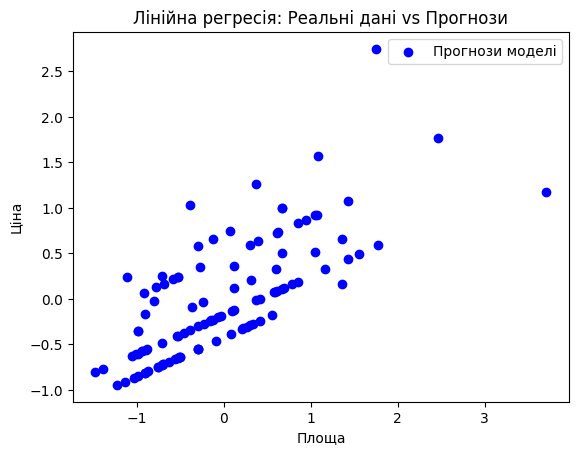

In [43]:
plt.scatter(X_test[:, 0], y_pred, color='blue', label='Прогнози моделі')
plt.title('Лінійна регресія: Реальні дані vs Прогнози')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.legend()
plt.show()


Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.

In [44]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
coef_sklearn = model.coef_
intercept_sklearn = model.intercept_
print(f"Аналітично - Вільний член (bias): {theta_best[0]}, Коефіцієнти: {theta_best[1:]}")
print(f"Sklearn - Вільний член (bias): {intercept_sklearn}, Коефіцієнти: {coef_sklearn}")


Аналітично - Вільний член (bias): -0.0007675112307538763, Коефіцієнти: [0.42979285 0.18136795 0.32210837]
Sklearn - Вільний член (bias): -0.0007675112307535437, Коефіцієнти: [0.42979285 0.18136795 0.32210837]
